<a href="https://colab.research.google.com/github/Hollykid10/Customer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [71]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.cluster import KMeans


In [3]:
# kaggle_dict = json.load(open("kaggle.json"))

In [4]:
# os.environ["KAGGLE_USERNAME"] = kaggle_dict["username"]
# os.environ["KAGGLE_KEY"] = kaggle_dict["key"]

In [5]:
kaggle_dict = json.load(open("kaggle.json"))

In [6]:
os.environ["KAGGLE_USERNAME"] = kaggle_dict["username"]
os.environ["KAGGLE_KEY"] = kaggle_dict["key"]

In [7]:
!kaggle datasets download -d shwetabh123/mall-customers

Dataset URL: https://www.kaggle.com/datasets/shwetabh123/mall-customers
License(s): CC0-1.0
  0% 0.00/1.56k [00:00<?, ?B/s]
100% 1.56k/1.56k [00:00<00:00, 1.24MB/s]


In [8]:
from zipfile import ZipFile
dataset = "/content/mall-customers.zip"
with ZipFile(dataset, "r") as zip:
  zip.extractall()
print("done")

done


In [9]:
customers = pd.read_csv("Mall_Customers.csv")

In [10]:
customers.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
customers.shape

(200, 5)

In [12]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
customers.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [14]:
customers.duplicated().any()

False

**Data Preprocessing**

In [25]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [30]:
# Rename column
customers.rename({"Genre":"Gender"}, axis=1, inplace=True)

In [31]:
customers.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [32]:
customers.replace({"Gender":{"Male":1, "Female":0}}, inplace=True)

In [33]:
customers.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [34]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


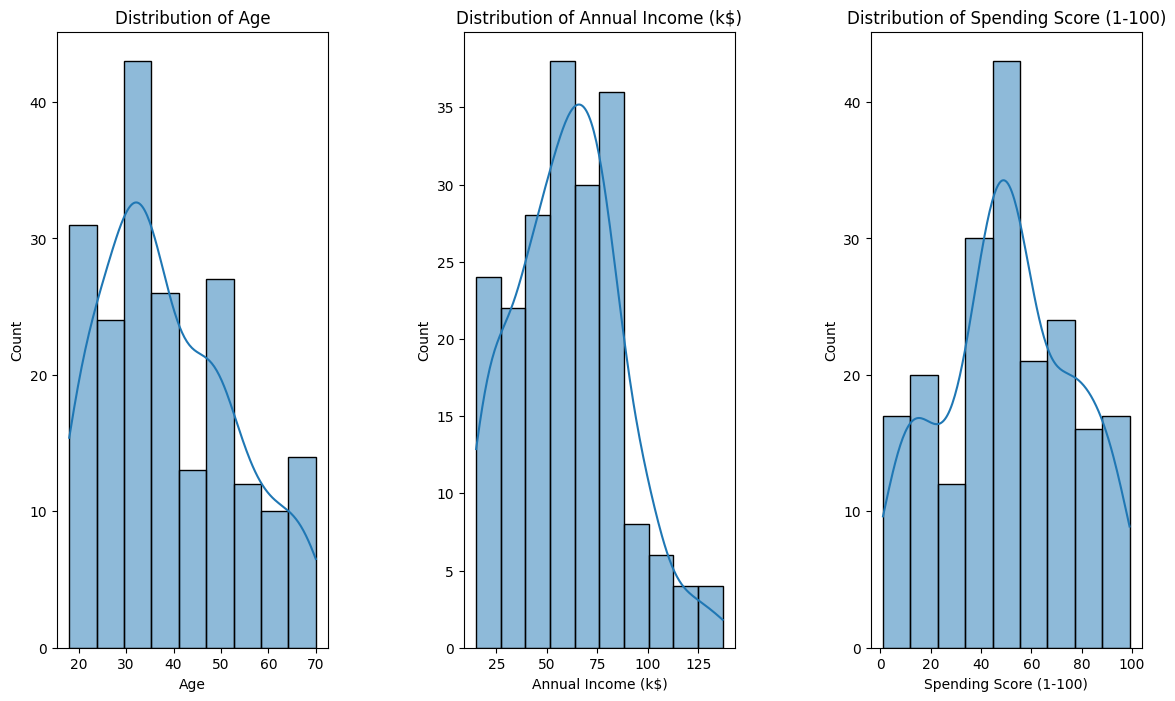

In [70]:
plt.figure(1, figsize=(14, 8))
n = 0
for i in ["Age","Annual Income (k$)","Spending Score (1-100)"]:
  n += 1
  plt.subplot(1, 3, n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.histplot(customers[i], kde=True)
  plt.title(f"Distribution of {i}")
plt.show()

In the code above, we visualize the distribution of age, annual income and spending score. Each subplot represent the distribution of a specific feature (["Age", "Spending Score (1-100)", "Annual Income (k$)"]). We use histplot function from seaborn library to create each plot.

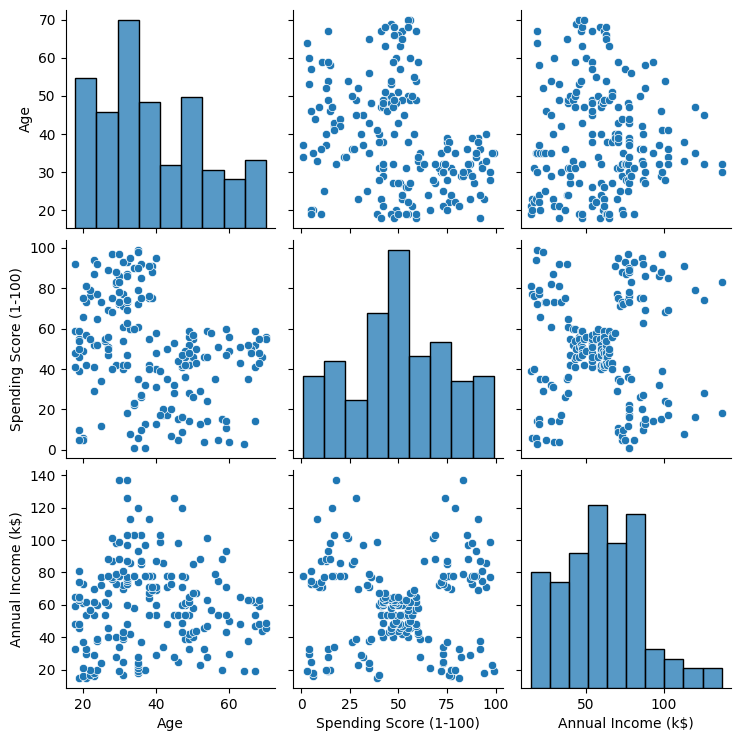

In [36]:
sns.pairplot(customers[["Age", "Spending Score (1-100)", "Annual Income (k$)"]])
plt.show()

**Relationship between Annual Income (k$) and Spending Score (1-100)**

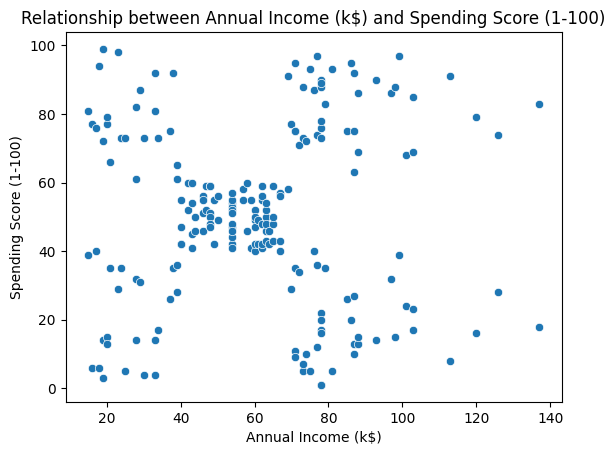

In [45]:
sns.scatterplot(data=customers, x= "Annual Income (k$)", y="Spending Score (1-100)")
plt.title("Relationship between Annual Income (k$) and Spending Score (1-100)")
plt.show()

**Relationship between Age, Annual Income (k$) and Spending Score**

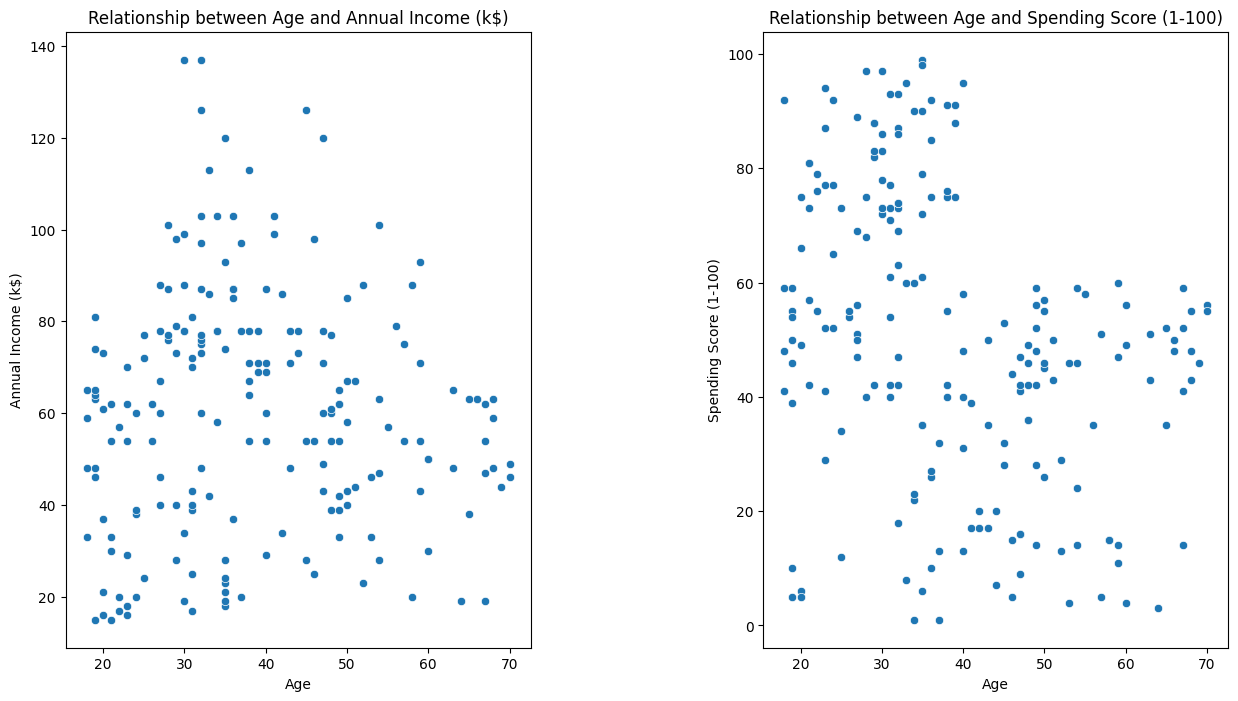

In [51]:
plt.figure(1,figsize=(15, 8))
n = 0
for i in ["Annual Income (k$)","Spending Score (1-100)"]:
  n += 1
  plt.subplot(1, 2, n)
  plt.subplots_adjust(hspace= 0.5, wspace=0.5)
  sns.scatterplot(data=customers, x = "Age", y = i)
  plt.title(f"Relationship between Age and {i}")

plt.show()

**Relationship between Gender and Age, Annual Income (k$) and Spending Score (1-100)**

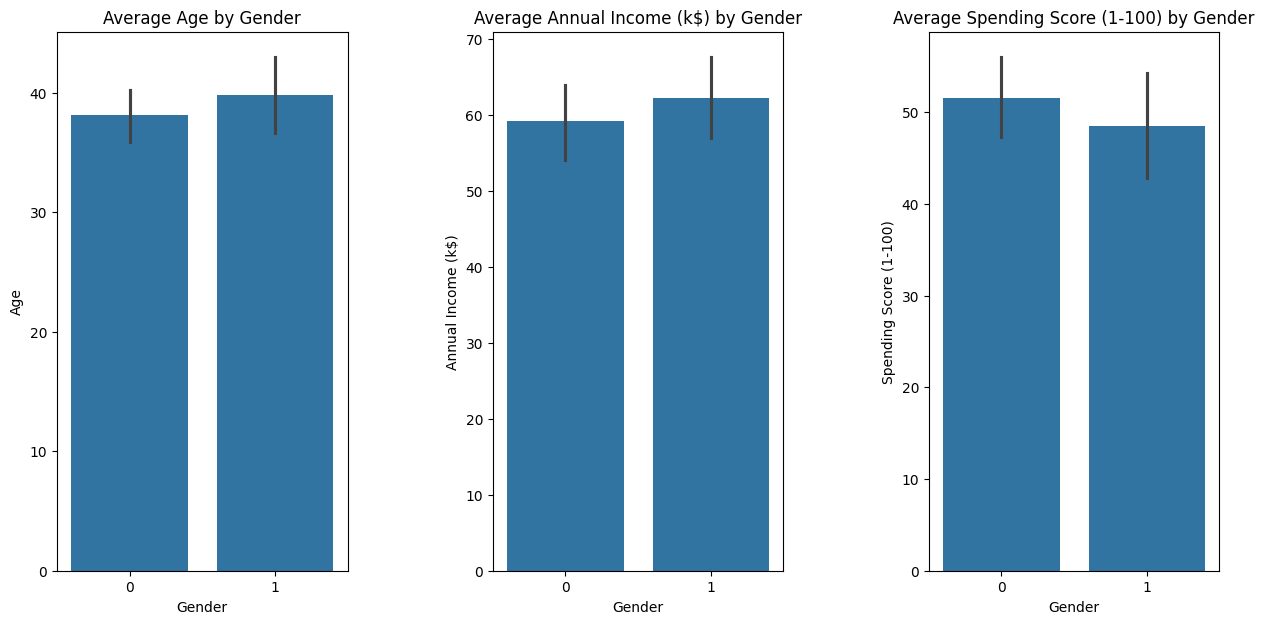

In [52]:
plt.figure(1, figsize=(15, 7))
n = 0
for i in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
  n += 1
  plt.subplot(1, 3, n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.barplot(data=customers, x="Gender", y = i)
  plt.title(f"Average {i} by Gender")
plt.show()

In the code above, we visualize the relationship between gender and Age, Annual Income (k$), Spending Score (1-100). Each subplot represent the relation that exist between gender and Age, Gender and Annual Income (k$), and Gender and  Spending Score (1-100). The plot shows that average age, annual income of male is slightly higher than female, while spending score of female is slightly higher than male.

**Average Spending score by Gender and Annual income**

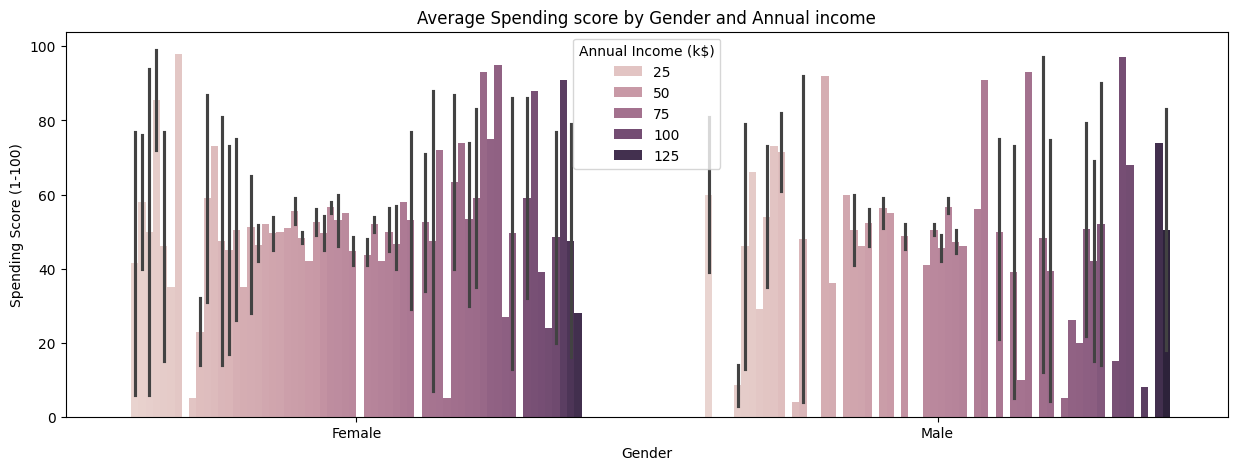

In [56]:
plt.figure(figsize=(15, 5))
sns.barplot(data=customers, x= "Gender", hue="Annual Income (k$)", y="Spending Score (1-100)")
plt.title("Average Spending score by Gender and Annual income")
plt.xticks(ticks=[0,1], labels=["Female", "Male"])
plt.show()

**Effect of Age, Annual Income and gender on Spending Score**

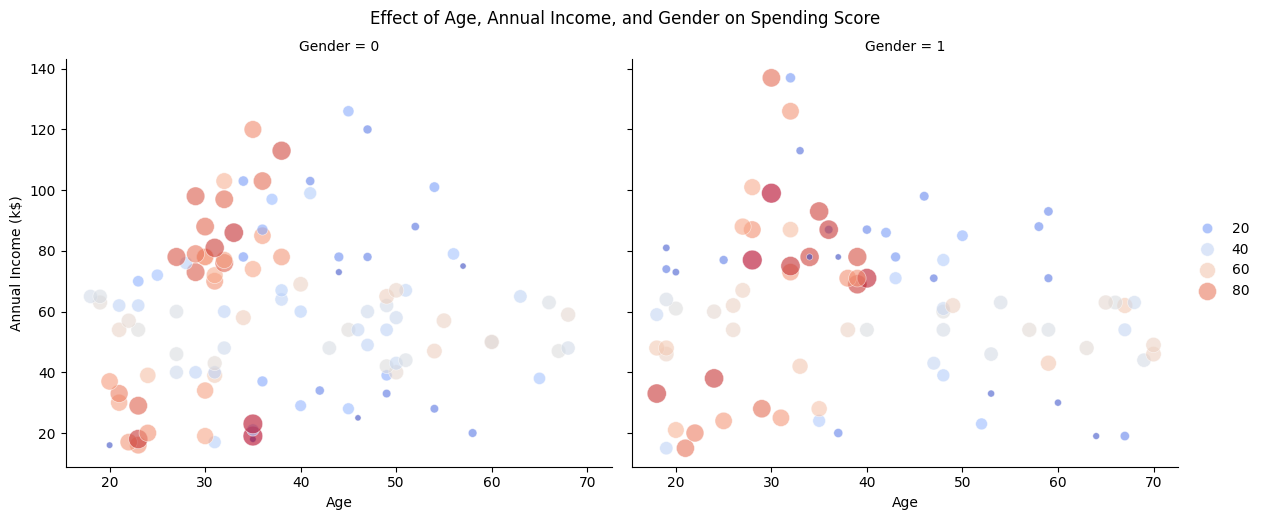

In [62]:
g = sns.FacetGrid(customers, col="Gender", height=5, aspect=1.2)
g.map_dataframe(sns.scatterplot, x="Age", y="Annual Income (k$)", size="Spending Score (1-100)", hue="Spending Score (1-100)", palette="coolwarm", sizes=(20, 200), alpha=0.6)

# Add titles and layout
g.add_legend()
g.set_axis_labels("Age", "Annual Income (k$)")
g.fig.suptitle("Effect of Age, Annual Income, and Gender on Spending Score", y=1.03)

plt.show()

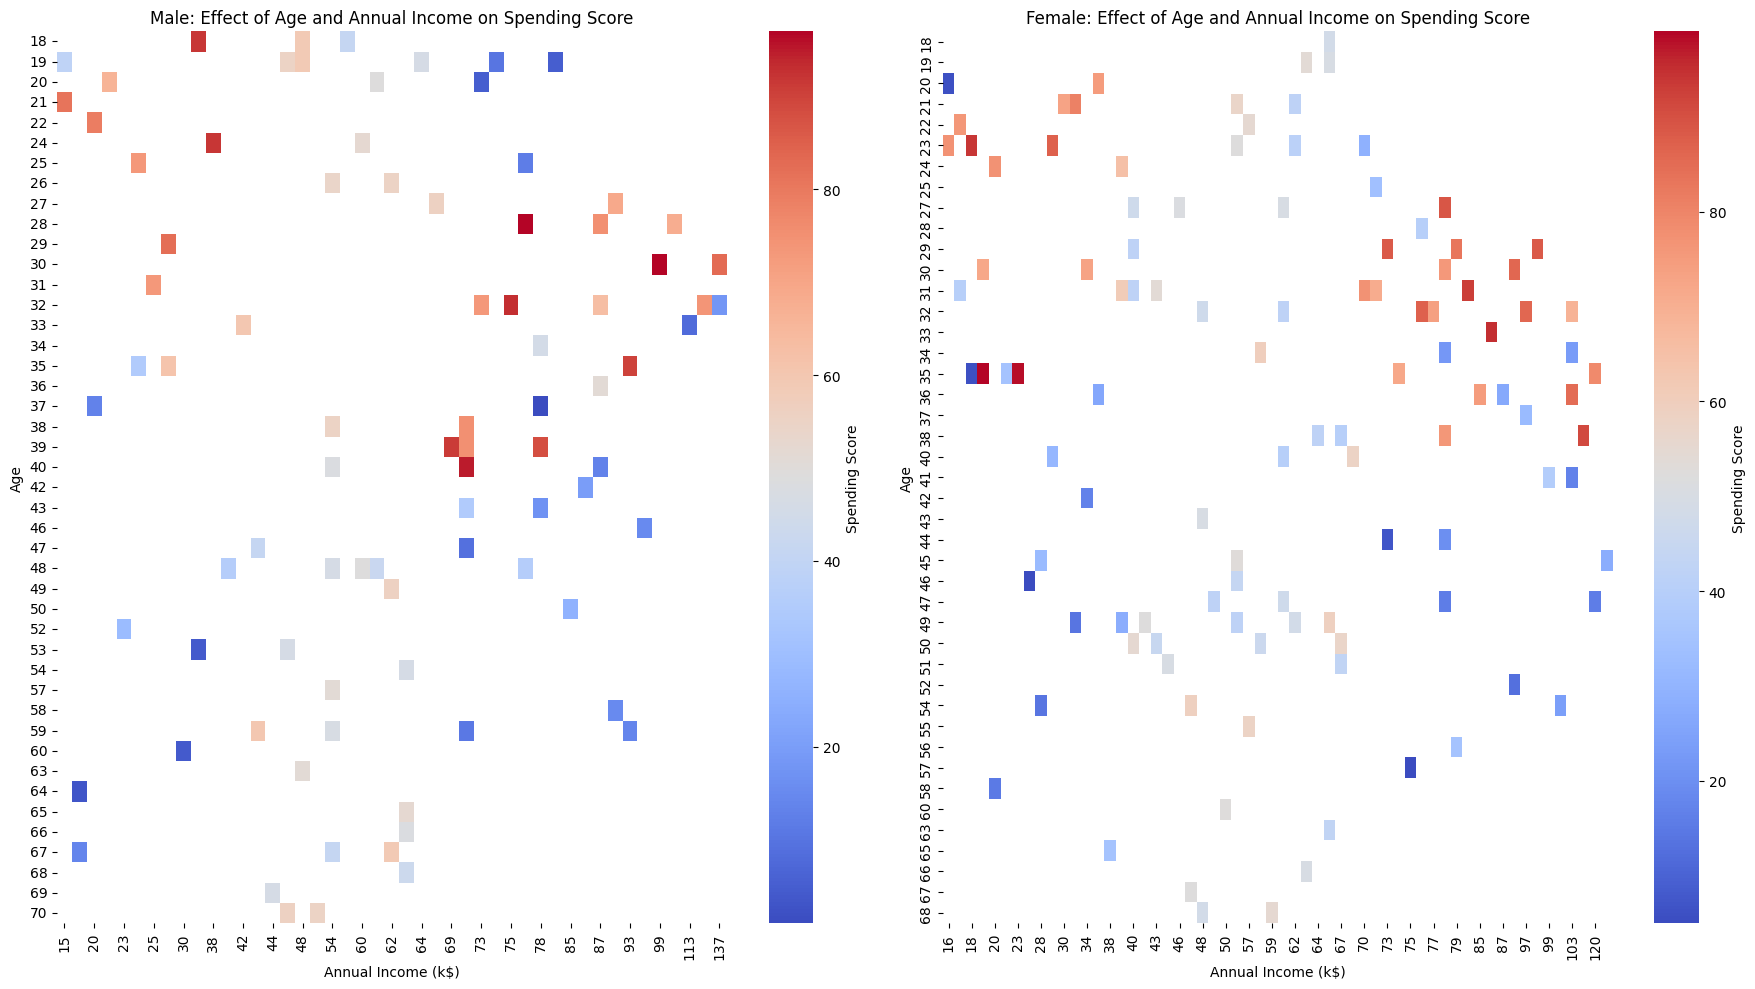

In [65]:
# Pivot the data for heatmap visualization
# We will calculate the average spending score for each Age and Annual Income combination
df_pivot_male = customers[customers['Gender'] == 1].pivot_table(index='Age', columns='Annual Income (k$)', values='Spending Score (1-100)', aggfunc='mean')
df_pivot_female = customers[customers['Gender'] == 0].pivot_table(index='Age', columns='Annual Income (k$)', values='Spending Score (1-100)', aggfunc='mean')

# Set up the figure
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# Heatmap for Male customers
sns.heatmap(df_pivot_male, ax=axes[0], cmap='coolwarm', cbar_kws={'label': 'Spending Score'}, annot=False)
axes[0].set_title("Male: Effect of Age and Annual Income on Spending Score")
axes[0].set_xlabel("Annual Income (k$)")
axes[0].set_ylabel("Age")

# Heatmap for Female customers
sns.heatmap(df_pivot_female, ax=axes[1], cmap='coolwarm', cbar_kws={'label': 'Spending Score'}, annot=False)
axes[1].set_title("Female: Effect of Age and Annual Income on Spending Score")
axes[1].set_xlabel("Annual Income (k$)")
axes[1].set_ylabel("Age")

plt.tight_layout()
plt.show()

**`Creating Clusters`**

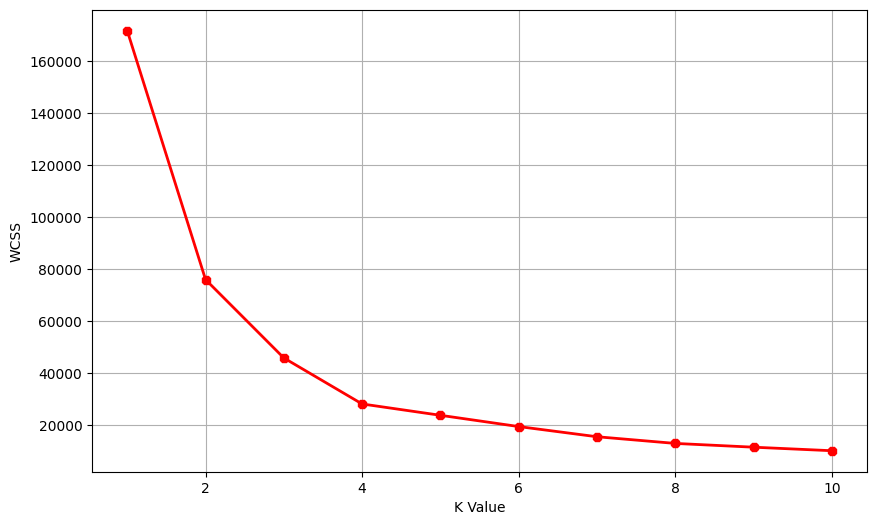

In [74]:
x1 = customers.loc[:, ["Age", "Spending Score (1-100)"]].values
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters= i, n_init=10, random_state=42)
  kmeans.fit(x1)
  wcss.append(kmeans.inertia_)

# Plot an elbow graph to find out which cluster have minimum value
plt.figure(figsize=(10, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()


**Fit that clusters into KMean model and predict labels, and also find centroids**

In [75]:
kmeans = KMeans(n_clusters=4, n_init=10)
label = kmeans.fit_predict(x1)
print(label)

[3 1 0 1 3 1 0 1 0 1 0 1 0 1 0 1 3 3 0 1 3 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0
 1 0 1 2 1 2 3 0 3 2 3 3 3 2 3 3 2 2 2 2 2 3 2 2 3 2 2 2 3 2 2 3 3 2 2 2 2
 2 3 2 3 3 2 2 3 2 2 3 2 2 3 3 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 3 3 3 3 2 2 2 2 3 3 3 1 3 1 2 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1 3 1 0 1 2 1
 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0 1 0 1 0 1 3
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [76]:
print(kmeans.cluster_centers_)

[[43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [55.70833333 48.22916667]
 [27.61702128 49.14893617]]


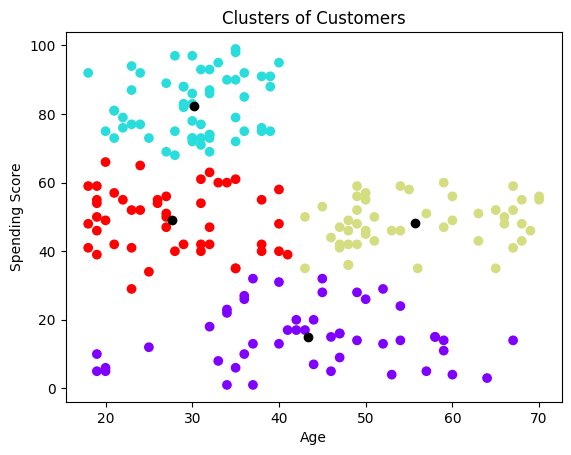

In [78]:
# Visualize the clusters
plt.scatter(x1[:, 0], x1[:, 1], c=kmeans.labels_, cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color="black")
plt.title("Clusters of Customers")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()

**Similarly, I perfrom same operations on different columns and visualize clusters of each**

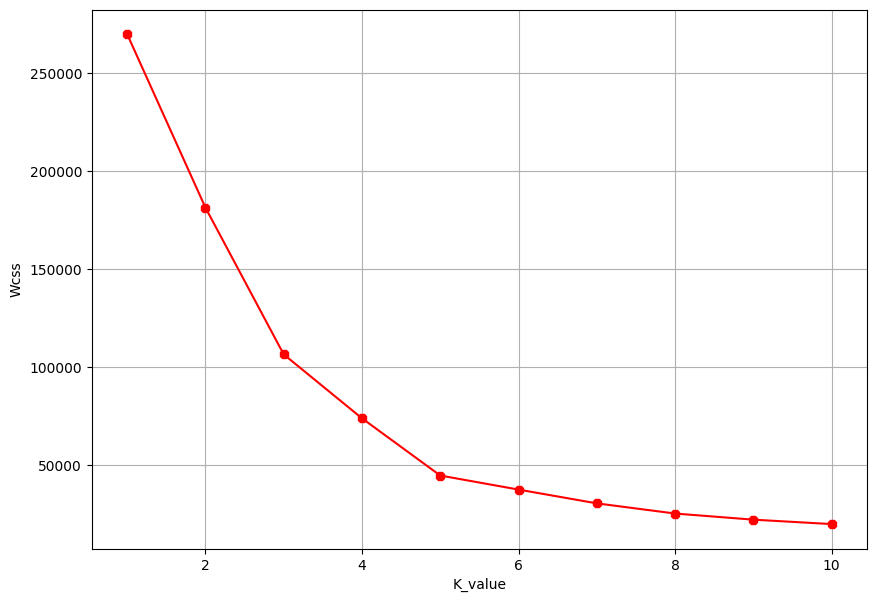

In [86]:
# Cluster of Annual income and Spending Score

x2 = customers.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]].values
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, n_init=10)
  kmeans.fit(x2)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 7))
plt.grid()
plt.plot(range(1, 11), wcss, color="red", marker="8")
plt.xlabel("K_value")
plt.ylabel("Wcss")
plt.show()

In [87]:
kmeans = KMeans(n_clusters=4, n_init=10)
label = kmeans.fit_predict(x2)
print(label)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [88]:
print(kmeans.cluster_centers_)

[[87.         18.63157895]
 [48.26       56.48      ]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]]


**Visualize the cluster**

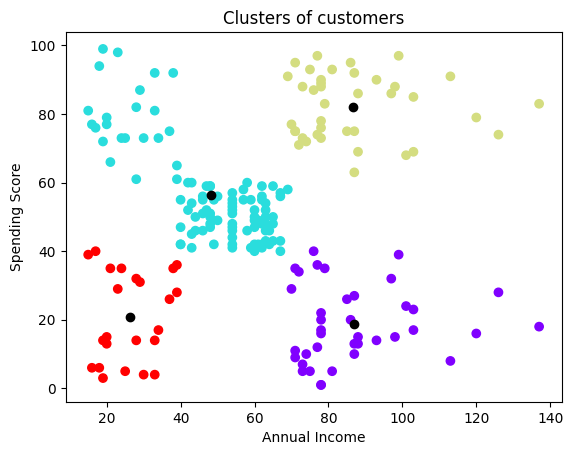

In [89]:
plt.scatter(x2[:, 0], x2[:, 1], c=kmeans.labels_, cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color="black")
plt.title("Clusters of customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

**Now we will create a cluster for all the three columns i.e Age, Annual Income, Spending Score**

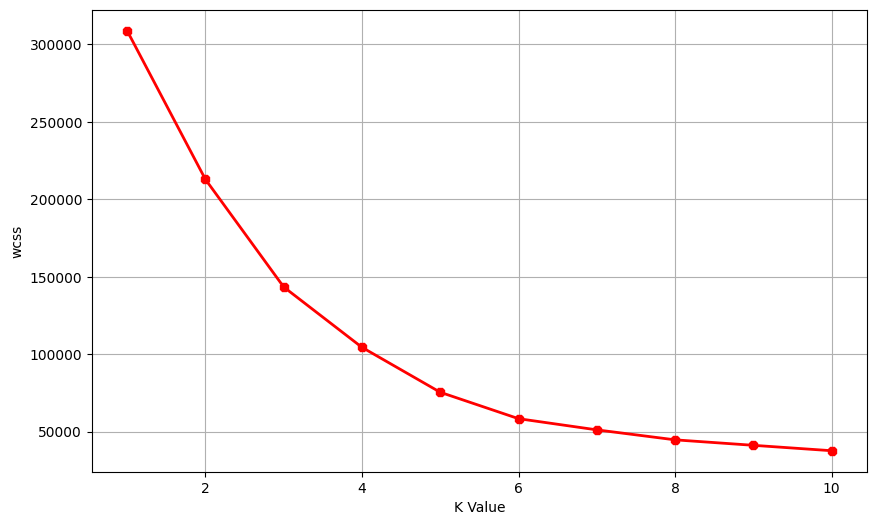

In [92]:
x3 = customers.iloc[:, 1:]
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, n_init=10)
  kmeans.fit(x3)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.grid()
plt.plot(range(1, 11), wcss, color="red", marker="8", linewidth=2)
plt.xlabel("K Value")
plt.ylabel("wcss")
plt.show()

**Fit and Find Centroid**

In [93]:
kmeans = KMeans(n_clusters=6, n_init=10)
label = kmeans.fit_predict(x3)
print(label)

[3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3
 5 3 5 4 5 3 0 3 5 4 0 0 0 4 0 0 4 4 4 4 4 0 4 4 0 4 4 4 0 4 4 0 0 4 4 4 4
 4 0 4 0 0 4 4 0 4 4 0 4 4 0 0 4 4 0 4 0 0 0 4 0 4 0 0 4 4 0 4 0 4 4 4 4 4
 0 0 0 0 0 4 4 4 4 0 0 0 1 0 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [94]:
print(kmeans.cluster_centers_)

[[ 0.34210526 27.         56.65789474 49.13157895]
 [ 0.46153846 32.69230769 86.53846154 82.12820513]
 [ 0.57142857 41.68571429 88.22857143 17.28571429]
 [ 0.40909091 44.31818182 25.77272727 20.27272727]
 [ 0.43181818 56.34090909 53.70454545 49.38636364]
 [ 0.40909091 25.27272727 25.72727273 79.36363636]]


**In the follow step, I will create a 3D graph as there are three dimensions each dimension corresponding to one column.**

**We create 3D graph with mpl_toolkits**

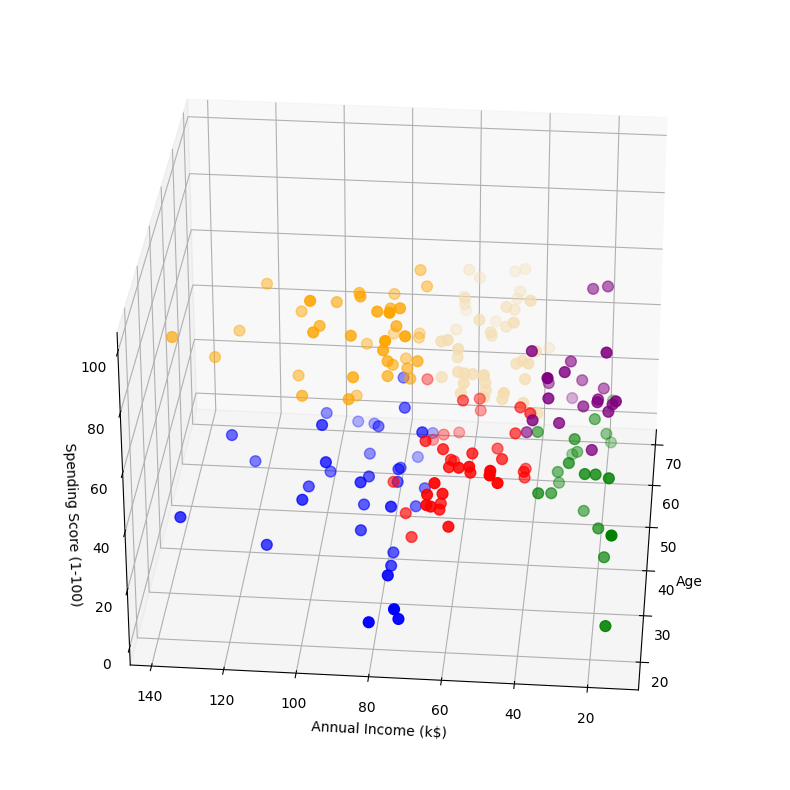

In [99]:
clusters = kmeans.fit_predict(x3)
customers["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(customers.Age[customers.label==0], customers["Annual Income (k$)"][customers.label==0], customers["Spending Score (1-100)"][customers.label==0], c="blue", s=60)
ax.scatter(customers.Age[customers.label==1], customers["Annual Income (k$)"][customers.label==1], customers["Spending Score (1-100)"][customers.label==1], c="red", s=60)
ax.scatter(customers.Age[customers.label==2], customers["Annual Income (k$)"][customers.label==2], customers["Spending Score (1-100)"][customers.label==2], c="orange", s=60)
ax.scatter(customers.Age[customers.label==3], customers["Annual Income (k$)"][customers.label==3], customers["Spending Score (1-100)"][customers.label==3], c="wheat", s=60)
ax.scatter(customers.Age[customers.label==4], customers["Annual Income (k$)"][customers.label==4], customers["Spending Score (1-100)"][customers.label==4], c="purple", s=60)
ax.scatter(customers.Age[customers.label==5], customers["Annual Income (k$)"][customers.label==5], customers["Spending Score (1-100)"][customers.label==5], c="green", s=60)
ax.view_init(30, 185)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")

plt.show()

**In this graph, each color represents different features.**

**SUMMARY**

**In this machine learning project, I successfully created Segments of customers using the K-means clustering algorithm. I learned how to analyze the dataset in different ways, and also visualize the dataset to know the details of the dataset and find the relation between different columns. I also learned about K-means clustering and how to use it efficiently to create clusters and segment the data.**